In [1]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.model_selection import train_test_split

In [24]:
data = './BillionairesStatisticsDataset.csv'
dataset = pd.read_csv(data)

for column in dataset:
    if dataset[column].dtype == 'object':
        dataset[column] = pd.factorize(dataset[column])[0]

dataset.dropna(inplace=True)
dataset = dataset[
    [
        "finalWorth",
        "age",
        "country",
        "city",
    ]
]

dataset = dataset.head(100)
dataset

,finalWorth,age,country,city
0,211000,74.0,0,0
1,180000,51.0,1,1
2,114000,59.0,1,2
3,107000,78.0,1,3
4,106000,92.0,1,4
...,...,...,...,...
98,17100,92.0,1,5
99,16700,70.0,8,65
100,16500,72.0,7,66
101,16500,55.0,20,67


<Axes: >

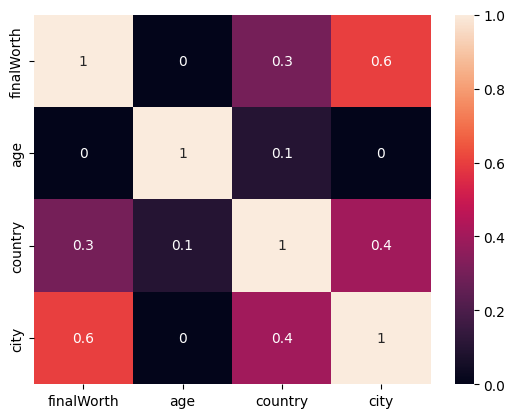

In [25]:
sns.heatmap(
    round(
        abs(dataset.corr()),
        1,
    ),
    annot=True
)

In [28]:
train_input, test_input, train_output, test_output = train_test_split(
    dataset.drop("age", axis=1),
    dataset["age"],
    test_size=0.2
)

Text(0.5, 1.0, 'Матрица сходства')

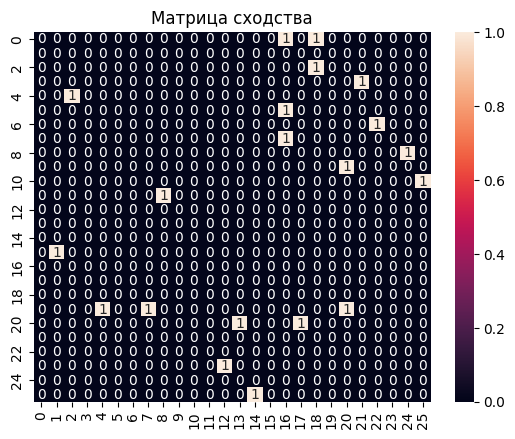

In [29]:
model = tree.DecisionTreeClassifier()
model.fit(train_input, train_output)

predictions = model.predict(test_input)
confusion_matrix = sklearn.metrics.confusion_matrix(predictions, test_output)

sns.heatmap(
    confusion_matrix,
    annot=True
)
plt.title('Матрица сходства')

Text(0.5, 1.0, 'Дерево решений')

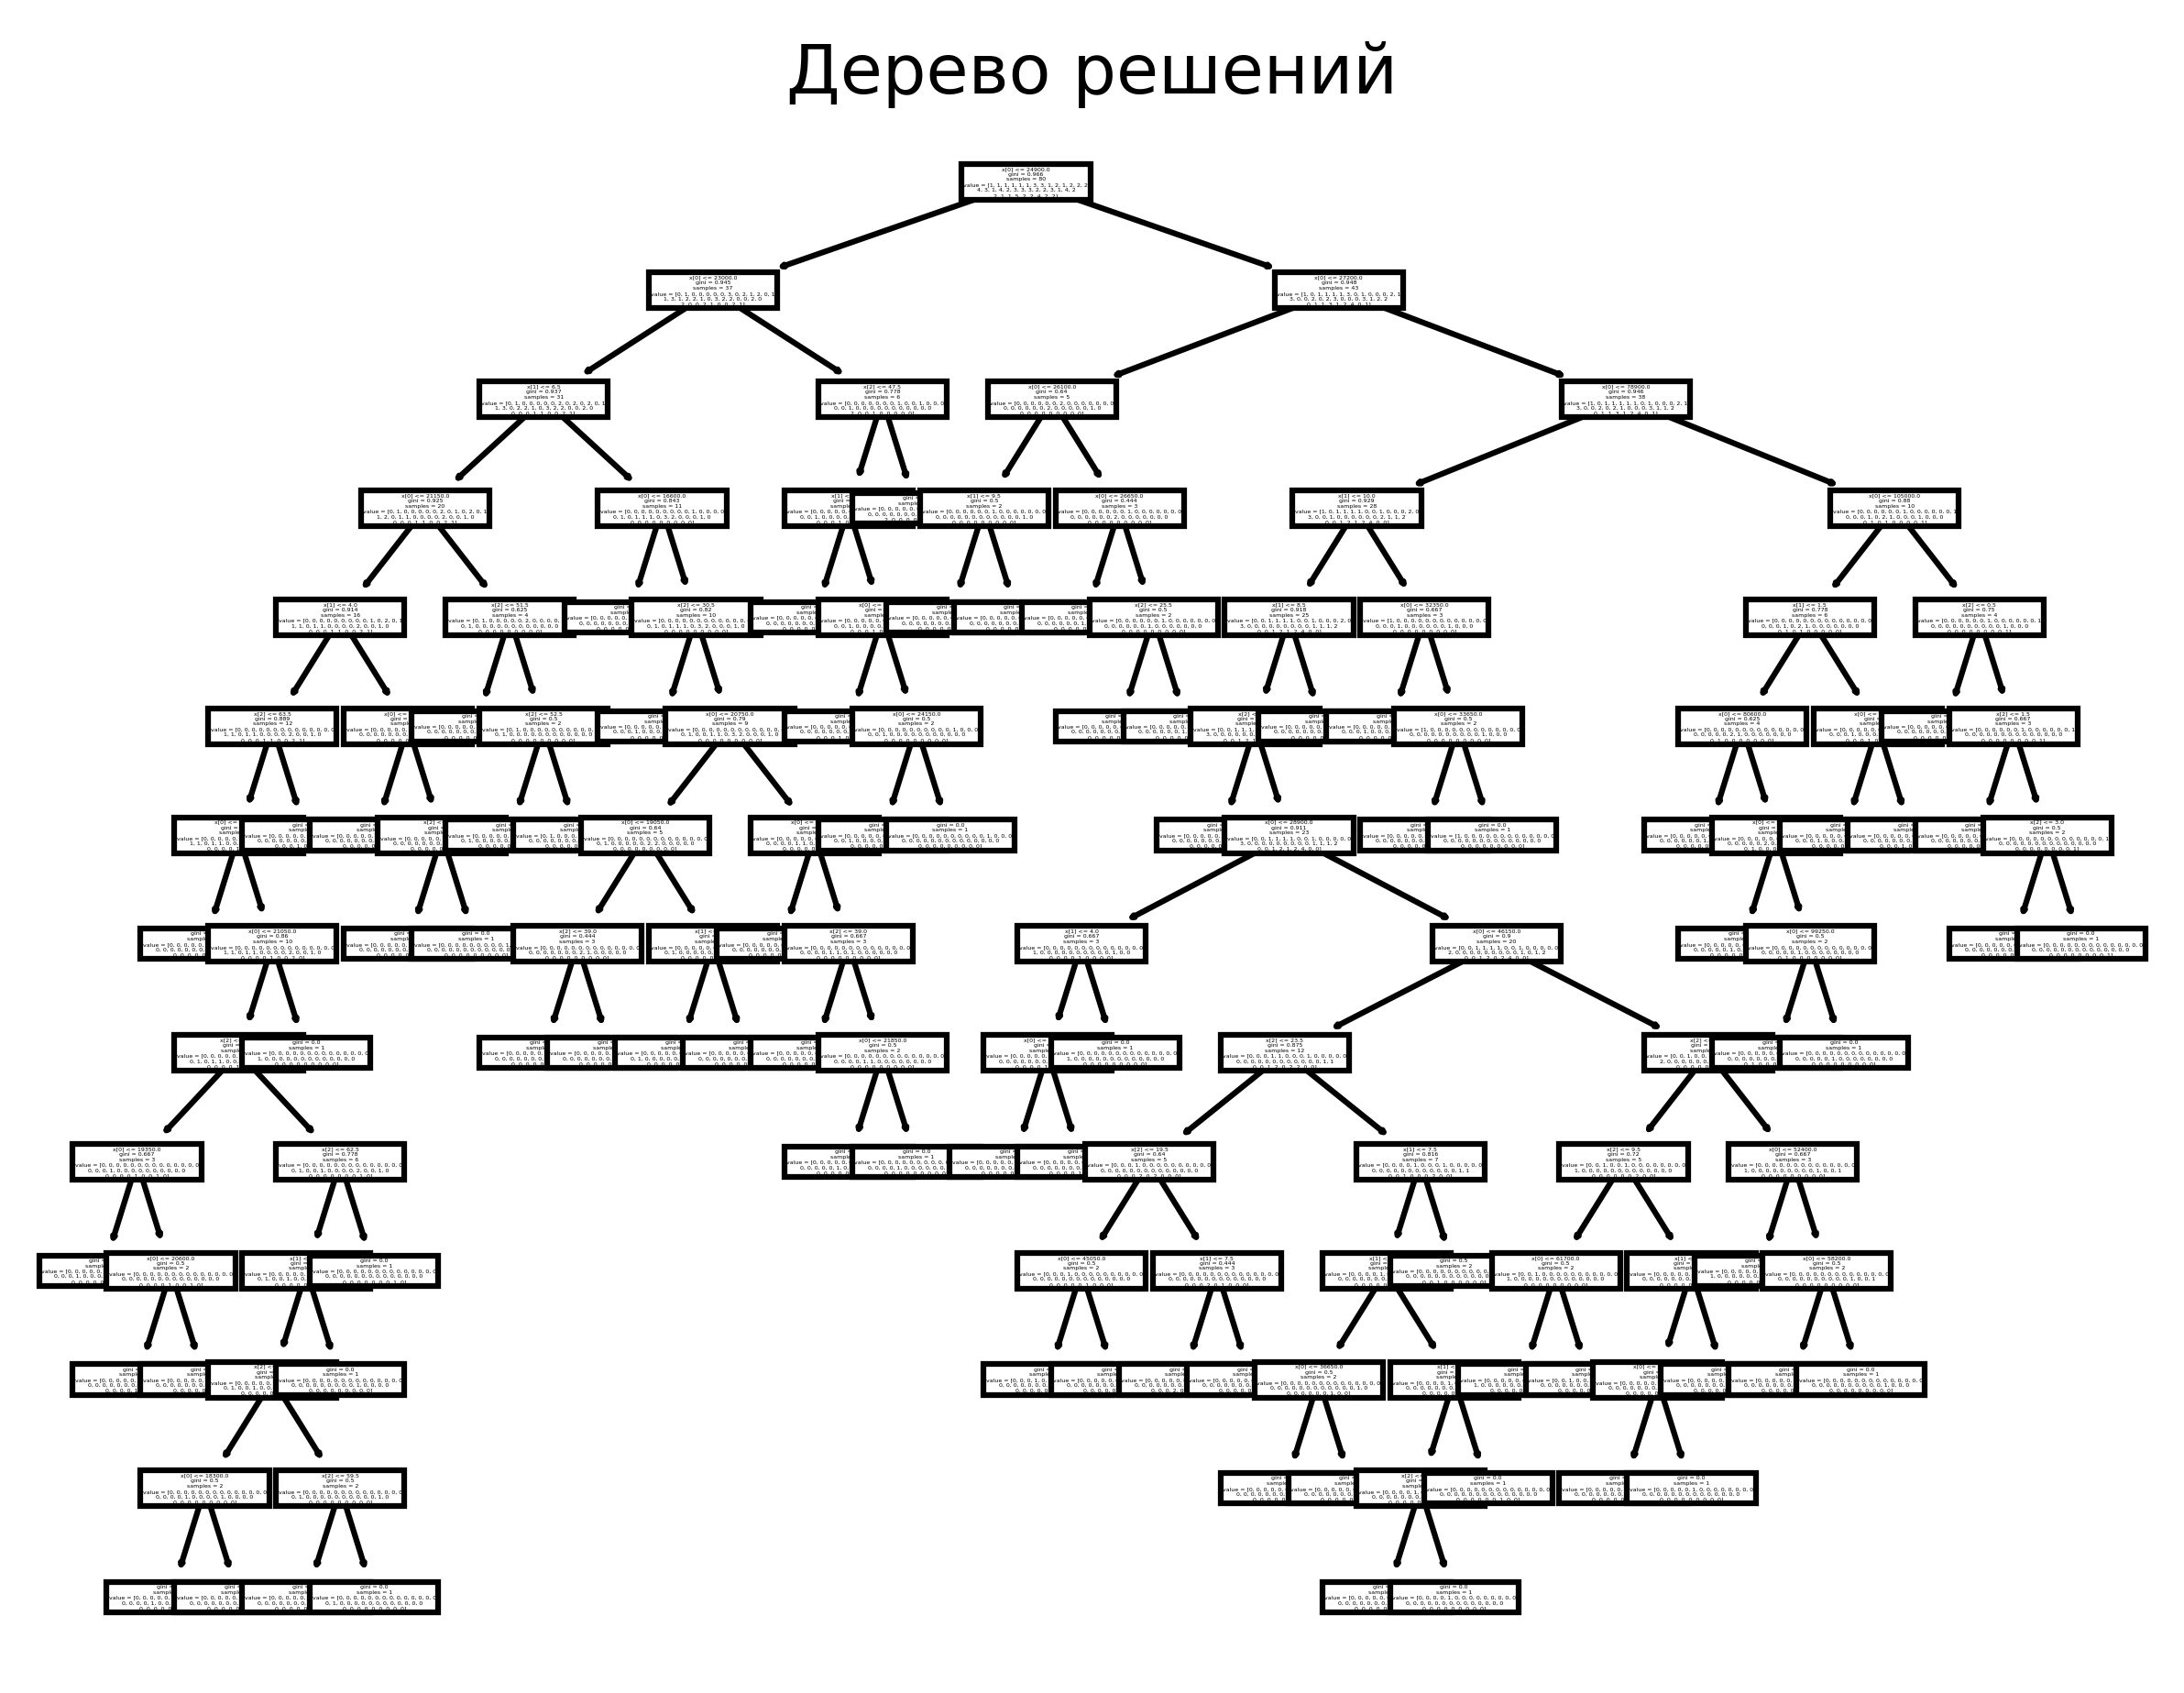

In [30]:
DPI = 450
plt.figure(dpi=DPI)
tree.plot_tree(model)
plt.title("Дерево решений")